In [133]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [134]:
train_df = pd.read_csv('train_df2.csv', index_col=0)
train_df.drop(['star_rating', 'pos_corpus', 'neg_corpus', 'pos_1', 'pos_2', 'pos_3', 
               'neg_1', 'neg_2', 'neg_3', 'prod_corpus', 'word_1', 'word_2', 'word_3'], axis=1, inplace=True)
train_df.drop(['cust_total_votes_mean', 'cust_total_votes_std', 'cust_helpful_votes_mean', 'cust_helpful_votes_std', 
               'prod_total_votes_mean', 'prod_total_votes_std', 'prod_helpful_votes_mean', 'prod_helpful_votes_std'], 
              axis=1, inplace=True)

train_df['avg_pos_word'] = train_df.apply((lambda x: (x.pos_1_word_1 + x.pos_1_word_2 + x.pos_1_word_3 +
                                                      x.pos_2_word_1 + x.pos_2_word_2 + x.pos_2_word_3 +
                                                      x.pos_3_word_1 + x.pos_3_word_2 + x.pos_3_word_3) / 9), axis=1)
train_df['avg_neg_word'] = train_df.apply((lambda x: (x.neg_1_word_1 + x.neg_1_word_2 + x.neg_1_word_3 +
                                                      x.neg_2_word_1 + x.neg_2_word_2 + x.neg_2_word_3 +
                                                      x.neg_3_word_1 + x.neg_3_word_2 + x.neg_3_word_3) / 9), axis=1)
train_df.drop(['pos_1_word_1', 'pos_1_word_2', 'pos_1_word_3', 'pos_2_word_1',
               'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1', 'pos_3_word_2',
               'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2', 'neg_1_word_3',
               'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3', 'neg_3_word_1',
               'neg_3_word_2', 'neg_3_word_3'], axis=1, inplace=True)

train_df.head()

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,neg_sim,avg_pos_word,avg_neg_word
0,1617361,849246716,1,5,5.000000,0.000000,297,4.872054,0.363625,0.033451,0.000000,0.308559,0.000000
1,53052607,849246716,0,5,3.600000,0.547723,297,4.872054,0.363625,0.012478,0.009009,0.096724,0.169741
2,15679577,849246716,1,8,3.375000,1.505941,297,4.872054,0.363625,0.007220,0.033333,0.067060,0.093065
3,16367779,849246716,1,9,4.444444,0.527046,297,4.872054,0.363625,0.095238,0.000000,-0.077627,0.000000
4,25485198,849246716,1,17,5.000000,0.000000,297,4.872054,0.363625,0.010870,0.000000,0.368011,0.000000


In [135]:
train_df.columns

Index(['customer_id', 'product_parent', 'positive', 'cust_review_count',
       'cust_star_rating_mean', 'cust_star_rating_std', 'prod_review_count',
       'prod_star_rating_mean', 'prod_star_rating_std', 'pos_sim', 'neg_sim',
       'avg_pos_word', 'avg_neg_word'],
      dtype='object')

In [136]:
train_df.groupby('positive').size()

positive
0     9531
1    38191
dtype: int64

In [137]:
temp = train_df[train_df.positive == 0]
#temp = pd.concat([temp, train_df[train_df.positive == 1][:14296]]) #9531
temp = pd.concat([temp, train_df[train_df.positive == 1].sample(22239)])
train_df = temp

In [138]:
train_df.groupby('positive').size() / len(train_df)

positive
0    0.3
1    0.7
dtype: float64

In [139]:
len(train_df[train_df.positive == 1]) / len(train_df)

0.7

In [140]:
test_df = pd.read_csv('test_df2.csv', index_col=0)
test_df.drop(['star_rating', 'pos_corpus', 'neg_corpus', 'pos_1', 'pos_2', 'pos_3', 
               'neg_1', 'neg_2', 'neg_3', 'prod_corpus', 'word_1', 'word_2', 'word_3'], axis=1, inplace=True)
test_df.drop(['cust_total_votes_mean', 'cust_total_votes_std', 'cust_helpful_votes_mean', 'cust_helpful_votes_std', 
               'prod_total_votes_mean', 'prod_total_votes_std', 'prod_helpful_votes_mean', 'prod_helpful_votes_std'], 
              axis=1, inplace=True)

test_df['avg_pos_word'] = test_df.apply((lambda x: (x.pos_1_word_1 + x.pos_1_word_2 + x.pos_1_word_3 +
                                                      x.pos_2_word_1 + x.pos_2_word_2 + x.pos_2_word_3 +
                                                      x.pos_3_word_1 + x.pos_3_word_2 + x.pos_3_word_3) / 9), axis=1)
test_df['avg_neg_word'] = test_df.apply((lambda x: (x.neg_1_word_1 + x.neg_1_word_2 + x.neg_1_word_3 +
                                                      x.neg_2_word_1 + x.neg_2_word_2 + x.neg_2_word_3 +
                                                      x.neg_3_word_1 + x.neg_3_word_2 + x.neg_3_word_3) / 9), axis=1)
test_df.drop(['pos_1_word_1', 'pos_1_word_2', 'pos_1_word_3', 'pos_2_word_1',
               'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1', 'pos_3_word_2',
               'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2', 'neg_1_word_3',
               'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3', 'neg_3_word_1',
               'neg_3_word_2', 'neg_3_word_3'], axis=1, inplace=True)
test_df.head()

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,neg_sim,avg_pos_word,avg_neg_word
0,36330222,986428010,1,24,4.291667,1.267629,18,4.333333,1.188177,0.070423,0.012295,-0.031375,-0.011993
1,24360083,986428010,1,23,4.347826,1.191206,18,4.333333,1.188177,0.095361,0.049808,0.933571,0.547893
2,28891040,437083384,1,10,4.500000,0.707107,407,4.503686,0.887439,0.006944,0.005208,0.172577,0.136230
3,52449052,437083384,0,5,3.400000,1.516575,407,4.503686,0.887439,0.010390,0.059514,0.250885,0.003912
4,27192976,437083384,1,6,4.666667,0.816497,407,4.503686,0.887439,0.012942,0.003460,0.039631,-0.029838


In [141]:
test_df.groupby('positive').size()

positive
0     3573
1    12262
dtype: int64

In [142]:
len(test_df[test_df.positive == 1]) / len(test_df)

0.774360593621724

In [143]:
train_x, train_y = train_df.drop('positive', axis=1), train_df['positive']
test_x, test_y = test_df.drop('positive', axis=1), test_df['positive']

In [144]:
is_NaN = train_df.isnull()
row_has_NaN = is_NaN.any(axis=1)
train_df[row_has_NaN]

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,neg_sim,avg_pos_word,avg_neg_word


In [145]:
def evaluate(m, x, test):
    correct = 0
    pos_count = 0
    matrix = [0, 0, 0, 0]
    preds = m.predict(x)
    for i in range(len(test)):
        if (preds[i] > 0.5):
            pos_count += 1
        if (preds[i] > 0.5 and test.iloc[i] > 0.5):
            correct += 1
            matrix[0] += 1
        elif (preds[i] <= 0.5 and test.iloc[i] <= 0.5):
            correct += 1
            matrix[1] += 1
        elif (preds[i] > 0.5 and test.iloc[i] <= 0.5):
            matrix[2] += 1
        elif (preds[i] <= 0.5 and test.iloc[i] > 0.5):
            matrix[3] += 1

    pos_f1 = 2 * ((matrix[0] / pos_count) * (matrix[0] / len(test_df[test_df.positive == 1]))) / ((matrix[0] / pos_count) + (matrix[0] / len(test_df[test_df.positive == 1])))
    neg_f1 = 2 * ((matrix[1] / (matrix[1] + matrix[3])) * (matrix[1] / (len(test_df[test_df.positive == 0])))) / ((matrix[1] / (matrix[1] + matrix[3])) + (matrix[1] / (len(test_df[test_df.positive == 0]))))
    print('Correct:', correct, correct / len(test_df))
    print('Pos:', pos_count, pos_count / len(test_df))
    print('True Positive:', matrix[0], matrix[0] / len(test_df))
    print('True Negative:', matrix[1], matrix[1] / len(test_df))
    print('False Positive:', matrix[2], matrix[2] / len(test_df))
    print('False Negative:', matrix[3], matrix[3] / len(test_df))
    print('Positive Precision:', matrix[0] / pos_count)
    print('Positive Recall:', matrix[0] / len(test_df[test_df.positive == 1]))
    print('Positive F1 Score:', pos_f1)
    print('Negative Precision:', matrix[1] / (matrix[1] + matrix[3]))
    print('Negative Recall:', matrix[1] / (len(test_df[test_df.positive == 0])))
    print('Negative F1 Score:', neg_f1)

In [146]:
drop_cols = ['customer_id', 'product_parent', 'cust_review_count', 'prod_review_count', 
             'cust_star_rating_std', 'prod_star_rating_std']
             #'neg_1_word_1', 'neg_1_word_2', 'neg_1_word_3',
             #'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3', 
             #'neg_3_word_1', 'neg_3_word_2', 'neg_3_word_3']

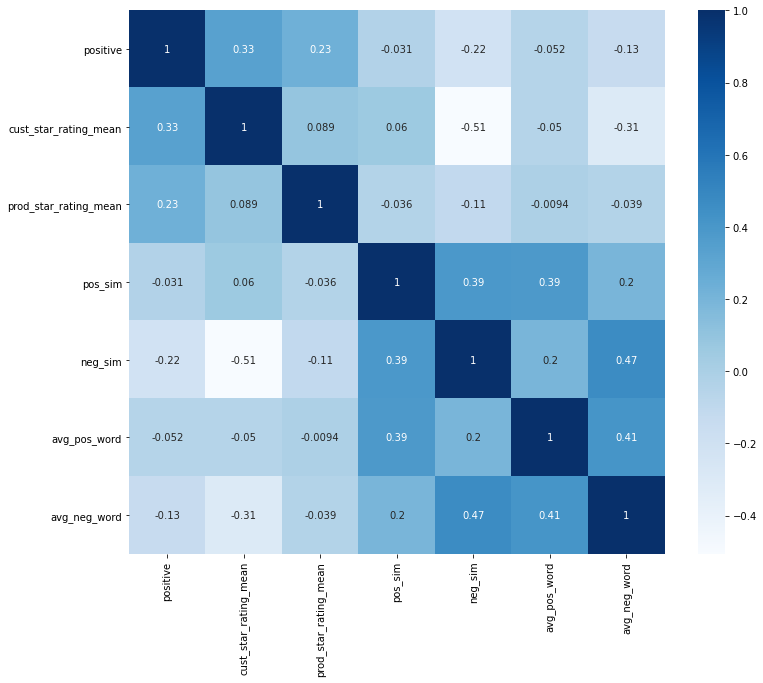

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train_df.drop(drop_cols, axis=1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [148]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(train_x.drop(drop_cols, axis=1), train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [149]:
gb.score(test_x.drop(drop_cols, axis=1), test_y)

0.7655825702557626

In [150]:
evaluate(gb, test_x.drop(drop_cols, axis=1), test_y)

Correct: 12123 0.7655825702557626
Pos: 12458 0.786738238080202
True Positive: 10504 0.6633407009788443
True Negative: 1619 0.10224186927691822
False Positive: 1954 0.12339753710135776
False Negative: 1758 0.1110198926428797
Positive Precision: 0.8431529940600417
Positive Recall: 0.8566302397651281
Positive F1 Score: 0.8498381877022653
Negative Precision: 0.47941960319810484
Negative Recall: 0.4531206269241534
Negative F1 Score: 0.46589928057553953


In [151]:
rf = RandomForestClassifier(n_estimators=1000, criterion='entropy', n_jobs=-1)
rf.fit(train_x.drop(drop_cols, axis=1), train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [152]:
rf.score(test_x.drop(drop_cols, axis=1), test_y)

0.7511840858856963

In [153]:
evaluate(rf, test_x.drop(drop_cols, axis=1), test_y)

Correct: 11895 0.7511840858856963
Pos: 12214 0.7713293337543417
True Positive: 10268 0.648437006630881
True Negative: 1627 0.10274707925481529
False Positive: 1946 0.12289232712346068
False Negative: 1994 0.12592358699084308
Positive Precision: 0.8406746356639921
Positive Recall: 0.8373837873103899
Positive F1 Score: 0.8390259846380128
Negative Precision: 0.44932339132836235
Negative Recall: 0.45535964175762667
Negative F1 Score: 0.45232137892688357


<BarContainer object of 6 artists>

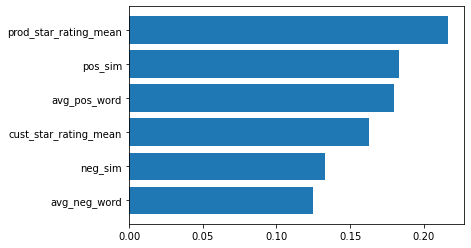

In [154]:
imp_tuples = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), 
                 train_x.drop(drop_cols, axis=1).columns), reverse=False)
imp = [t[0] for t in imp_tuples]
labl = [t[1] for t in imp_tuples]
plt.barh(labl, imp, linewidth=5)

In [155]:
rf2 = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
rf2.fit(train_x.drop(drop_cols, axis=1), train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [156]:
rf2.score(test_x.drop(drop_cols, axis=1), test_y)

0.00243437127140278

In [157]:
evaluate(rf2, test_x.drop(drop_cols, axis=1), test_y)

Correct: 11753 0.7422166087780233
Pos: 12016 0.7588253868013893
True Positive: 10098 0.6377012946005683
True Negative: 1655 0.10451531417745501
False Positive: 1918 0.12112409220082096
False Negative: 2164 0.13665929902115567
Positive Precision: 0.8403794940079894
Positive Recall: 0.8235198173218072
Positive F1 Score: 0.8318642392289315
Negative Precision: 0.4333595181984813
Negative Recall: 0.4631961936747831
Negative F1 Score: 0.4477813852813853


<BarContainer object of 6 artists>

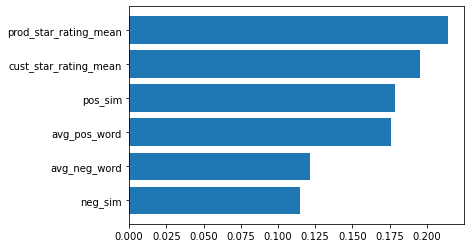

In [158]:
imp_tuples = sorted(zip(map(lambda x: round(x, 4), rf2.feature_importances_), 
                 train_x.drop(drop_cols, axis=1).columns), reverse=False)
imp = [t[0] for t in imp_tuples]
labl = [t[1] for t in imp_tuples]
plt.barh(labl, imp, linewidth=5)

In [159]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(train_x.drop(drop_cols, axis=1), train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [160]:
knn.score(test_x.drop(drop_cols, axis=1), test_y)

0.7044521629302178

In [161]:
evaluate(knn, test_x.drop(drop_cols, axis=1), test_y)

Correct: 11155 0.7044521629302178
Pos: 11512 0.7269971581938743
True Positive: 9547 0.6029049573729082
True Negative: 1608 0.10154720555730976
False Positive: 1965 0.12409220082096621
False Negative: 2715 0.1714556362488159
Positive Precision: 0.8293085476025017
Positive Recall: 0.7785842440058718
Positive F1 Score: 0.8031462942710523
Negative Precision: 0.37196391394864675
Negative Recall: 0.45004198152812763
Negative F1 Score: 0.4072948328267477


In [162]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x.drop(drop_cols, axis=1), train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [163]:
gnb.score(test_x.drop(drop_cols, axis=1), test_y)

0.7265550994632144

In [164]:
evaluate(gnb, test_x.drop(drop_cols, axis=1), test_y)

Correct: 11505 0.7265550994632144
Pos: 11732 0.7408904325860436
True Positive: 9832 0.620903062835491
True Negative: 1673 0.10565203662772339
False Positive: 1900 0.11998736975055257
False Negative: 2430 0.15345753078623303
Positive Precision: 0.8380497783839073
Positive Recall: 0.8018267819279074
Positive F1 Score: 0.8195382178878052
Negative Precision: 0.4077504265171826
Negative Recall: 0.46823397705009795
Negative F1 Score: 0.4359041167274622


In [165]:
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
import keras
import numpy as np

In [166]:
keras.backend.clear_session()

In [167]:
nn_train_x = train_x.drop(drop_cols, axis=1)
nn_test_x = test_x.drop(drop_cols, axis=1)

In [168]:
np.shape(nn_train_x)

(31770, 6)

In [169]:
network = models.Sequential()
network.add(layers.Dense(6, activation='relu', input_shape=(6,)))
network.add(layers.Dense(4, activation='relu', input_shape=(6,)))
network.add(layers.Dense(1, activation='sigmoid', input_shape=(4,)))
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [170]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

epochs = 500
history = network.fit(nn_train_x, 
                      train_y, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(nn_test_x, test_y))

Train on 31770 samples, validate on 15835 samples
Epoch 1/500
31770/31770 [==============================] - 1s 26us/step - loss: 0.5952 - accuracy: 0.7000 - val_loss: 0.5188 - val_accuracy: 0.7744
Epoch 2/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5788 - accuracy: 0.7031 - val_loss: 0.5075 - val_accuracy: 0.7792
Epoch 3/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5700 - accuracy: 0.7119 - val_loss: 0.5135 - val_accuracy: 0.7802
Epoch 4/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5646 - accuracy: 0.7165 - val_loss: 0.5134 - val_accuracy: 0.7796
Epoch 5/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5605 - accuracy: 0.7196 - val_loss: 0.5052 - val_accuracy: 0.7800
Epoch 6/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5570 - accuracy: 0.7211 - val_loss: 0.5080 - val_accuracy: 0.7798
Epoch 7/500
31770/31770 [==============================] - 1s 

31770/31770 [==============================] - 1s 21us/step - loss: 0.5284 - accuracy: 0.7412 - val_loss: 0.4907 - val_accuracy: 0.7701
Epoch 56/500
31770/31770 [==============================] - 1s 21us/step - loss: 0.5284 - accuracy: 0.7413 - val_loss: 0.4885 - val_accuracy: 0.7730
Epoch 57/500
31770/31770 [==============================] - 1s 21us/step - loss: 0.5284 - accuracy: 0.7406 - val_loss: 0.4979 - val_accuracy: 0.7652
Epoch 58/500
31770/31770 [==============================] - 1s 21us/step - loss: 0.5283 - accuracy: 0.7417 - val_loss: 0.5113 - val_accuracy: 0.7538
Epoch 59/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5283 - accuracy: 0.7406 - val_loss: 0.5016 - val_accuracy: 0.7612
Epoch 60/500
31770/31770 [==============================] - 1s 23us/step - loss: 0.5283 - accuracy: 0.7407 - val_loss: 0.5065 - val_accuracy: 0.7579
Epoch 61/500
31770/31770 [==============================] - 1s 21us/step - loss: 0.5284 - accuracy: 0.7417 - val_loss: 

31770/31770 [==============================] - 1s 21us/step - loss: 0.5279 - accuracy: 0.7414 - val_loss: 0.4983 - val_accuracy: 0.7673
Epoch 111/500
31770/31770 [==============================] - 1s 21us/step - loss: 0.5277 - accuracy: 0.7420 - val_loss: 0.4895 - val_accuracy: 0.7730
Epoch 112/500
31770/31770 [==============================] - 1s 21us/step - loss: 0.5279 - accuracy: 0.7410 - val_loss: 0.5094 - val_accuracy: 0.7610
Epoch 113/500
31770/31770 [==============================] - 1s 21us/step - loss: 0.5281 - accuracy: 0.7420 - val_loss: 0.4915 - val_accuracy: 0.7732
Epoch 114/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5278 - accuracy: 0.7415 - val_loss: 0.4760 - val_accuracy: 0.7813
Epoch 115/500
31770/31770 [==============================] - 1s 21us/step - loss: 0.5278 - accuracy: 0.7407 - val_loss: 0.4965 - val_accuracy: 0.7701
Epoch 116/500
31770/31770 [==============================] - 1s 21us/step - loss: 0.5278 - accuracy: 0.7422 - val_

Epoch 165/500
31770/31770 [==============================] - 1s 24us/step - loss: 0.5280 - accuracy: 0.7414 - val_loss: 0.5036 - val_accuracy: 0.7668
Epoch 166/500
31770/31770 [==============================] - 1s 24us/step - loss: 0.5278 - accuracy: 0.7415 - val_loss: 0.4973 - val_accuracy: 0.7711
Epoch 167/500
31770/31770 [==============================] - 1s 25us/step - loss: 0.5276 - accuracy: 0.7415 - val_loss: 0.4761 - val_accuracy: 0.7831
Epoch 168/500
31770/31770 [==============================] - 1s 24us/step - loss: 0.5277 - accuracy: 0.7429 - val_loss: 0.4808 - val_accuracy: 0.7799
Epoch 169/500
31770/31770 [==============================] - 1s 23us/step - loss: 0.5277 - accuracy: 0.7428 - val_loss: 0.5059 - val_accuracy: 0.7650
Epoch 170/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5275 - accuracy: 0.7415 - val_loss: 0.5070 - val_accuracy: 0.7645
Epoch 171/500
31770/31770 [==============================] - 1s 23us/step - loss: 0.5276 - accuracy:

31770/31770 [==============================] - 1s 23us/step - loss: 0.5273 - accuracy: 0.7419 - val_loss: 0.4986 - val_accuracy: 0.7706
Epoch 220/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5273 - accuracy: 0.7425 - val_loss: 0.4932 - val_accuracy: 0.7736
Epoch 221/500
31770/31770 [==============================] - 1s 25us/step - loss: 0.5274 - accuracy: 0.7431 - val_loss: 0.4818 - val_accuracy: 0.7787
Epoch 222/500
31770/31770 [==============================] - 1s 25us/step - loss: 0.5272 - accuracy: 0.7423 - val_loss: 0.4970 - val_accuracy: 0.7718
Epoch 223/500
31770/31770 [==============================] - 1s 26us/step - loss: 0.5274 - accuracy: 0.7418 - val_loss: 0.4843 - val_accuracy: 0.7781
Epoch 224/500
31770/31770 [==============================] - 1s 27us/step - loss: 0.5271 - accuracy: 0.7418 - val_loss: 0.5171 - val_accuracy: 0.7564
Epoch 225/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5273 - accuracy: 0.7421 - val_

Epoch 274/500
31770/31770 [==============================] - 1s 21us/step - loss: 0.5270 - accuracy: 0.7418 - val_loss: 0.4845 - val_accuracy: 0.7773
Epoch 275/500
31770/31770 [==============================] - 1s 21us/step - loss: 0.5270 - accuracy: 0.7423 - val_loss: 0.4894 - val_accuracy: 0.7751
Epoch 276/500
31770/31770 [==============================] - 1s 21us/step - loss: 0.5268 - accuracy: 0.7412 - val_loss: 0.5067 - val_accuracy: 0.7627
Epoch 277/500
31770/31770 [==============================] - 1s 23us/step - loss: 0.5269 - accuracy: 0.7424 - val_loss: 0.5026 - val_accuracy: 0.7668
Epoch 278/500
31770/31770 [==============================] - 1s 24us/step - loss: 0.5267 - accuracy: 0.7429 - val_loss: 0.4873 - val_accuracy: 0.7769
Epoch 279/500
31770/31770 [==============================] - 1s 23us/step - loss: 0.5267 - accuracy: 0.7425 - val_loss: 0.4913 - val_accuracy: 0.7761
Epoch 280/500
31770/31770 [==============================] - 1s 23us/step - loss: 0.5268 - accuracy:

31770/31770 [==============================] - 1s 24us/step - loss: 0.5268 - accuracy: 0.7415 - val_loss: 0.5063 - val_accuracy: 0.7642
Epoch 329/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5267 - accuracy: 0.7414 - val_loss: 0.4876 - val_accuracy: 0.7767
Epoch 330/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5268 - accuracy: 0.7420 - val_loss: 0.4793 - val_accuracy: 0.7817
Epoch 331/500
31770/31770 [==============================] - 1s 21us/step - loss: 0.5268 - accuracy: 0.7421 - val_loss: 0.4790 - val_accuracy: 0.7816
Epoch 332/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5269 - accuracy: 0.7417 - val_loss: 0.4890 - val_accuracy: 0.7747
Epoch 333/500
31770/31770 [==============================] - 1s 21us/step - loss: 0.5269 - accuracy: 0.7425 - val_loss: 0.4974 - val_accuracy: 0.7726
Epoch 334/500
31770/31770 [==============================] - 1s 21us/step - loss: 0.5268 - accuracy: 0.7421 - val_

Epoch 383/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5266 - accuracy: 0.7430 - val_loss: 0.4923 - val_accuracy: 0.7729
Epoch 384/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5266 - accuracy: 0.7418 - val_loss: 0.4813 - val_accuracy: 0.7794
Epoch 385/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5268 - accuracy: 0.7422 - val_loss: 0.4979 - val_accuracy: 0.7674
Epoch 386/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5268 - accuracy: 0.7421 - val_loss: 0.4848 - val_accuracy: 0.7788
Epoch 387/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5265 - accuracy: 0.7404 - val_loss: 0.4868 - val_accuracy: 0.7757
Epoch 388/500
31770/31770 [==============================] - 1s 21us/step - loss: 0.5267 - accuracy: 0.7423 - val_loss: 0.5030 - val_accuracy: 0.7671
Epoch 389/500
31770/31770 [==============================] - 1s 23us/step - loss: 0.5267 - accuracy:

31770/31770 [==============================] - 1s 22us/step - loss: 0.5266 - accuracy: 0.7425 - val_loss: 0.4912 - val_accuracy: 0.7756
Epoch 438/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5266 - accuracy: 0.7424 - val_loss: 0.4903 - val_accuracy: 0.7752
Epoch 439/500
31770/31770 [==============================] - 1s 24us/step - loss: 0.5266 - accuracy: 0.7423 - val_loss: 0.5165 - val_accuracy: 0.7596
Epoch 440/500
31770/31770 [==============================] - 1s 25us/step - loss: 0.5266 - accuracy: 0.7427 - val_loss: 0.4905 - val_accuracy: 0.7754
Epoch 441/500
31770/31770 [==============================] - 1s 23us/step - loss: 0.5266 - accuracy: 0.7426 - val_loss: 0.5048 - val_accuracy: 0.7685
Epoch 442/500
31770/31770 [==============================] - 1s 23us/step - loss: 0.5267 - accuracy: 0.7427 - val_loss: 0.4937 - val_accuracy: 0.7744
Epoch 443/500
31770/31770 [==============================] - 1s 23us/step - loss: 0.5264 - accuracy: 0.7429 - val_

31770/31770 [==============================] - 1s 22us/step - loss: 0.5266 - accuracy: 0.7425 - val_loss: 0.4887 - val_accuracy: 0.7759
Epoch 492/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5265 - accuracy: 0.7421 - val_loss: 0.4932 - val_accuracy: 0.7738
Epoch 493/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5263 - accuracy: 0.7420 - val_loss: 0.4877 - val_accuracy: 0.7763
Epoch 494/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5266 - accuracy: 0.7421 - val_loss: 0.4959 - val_accuracy: 0.7725
Epoch 495/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5265 - accuracy: 0.7427 - val_loss: 0.5221 - val_accuracy: 0.7552
Epoch 496/500
31770/31770 [==============================] - 1s 23us/step - loss: 0.5265 - accuracy: 0.7424 - val_loss: 0.5199 - val_accuracy: 0.7567
Epoch 497/500
31770/31770 [==============================] - 1s 22us/step - loss: 0.5267 - accuracy: 0.7414 - val_

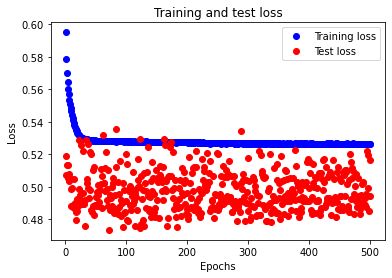

In [171]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

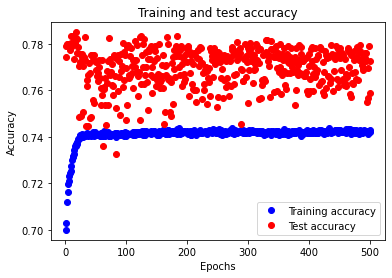

In [172]:
acc_values = history_dict['accuracy']
test_acc_values = history_dict['val_accuracy']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [173]:
correct = 0
pos_count = 0
matrix = [0, 0, 0, 0]
preds = network.predict(nn_test_x)
for i in range(len(test_y)):
    if (preds[i] > 0.5):
        pos_count += 1
    if (preds[i] > 0.5 and test_y.iloc[i] > 0.5):
        correct += 1
        matrix[0] += 1
    elif (preds[i] <= 0.5 and test_y.iloc[i] <= 0.5):
        correct += 1
        matrix[1] += 1
    elif (preds[i] > 0.5 and test_y.iloc[i] <= 0.5):
        matrix[2] += 1
    elif (preds[i] <= 0.5 and test_y.iloc[i] > 0.5):
        matrix[3] += 1

pos_f1 = 2 * ((matrix[0] / pos_count) * (matrix[0] / len(test_df[test_df.positive == 1]))) / ((matrix[0] / pos_count) + (matrix[0] / len(test_df[test_df.positive == 1])))
neg_f1 = 2 * ((matrix[1] / (matrix[1] + matrix[3])) * (matrix[1] / (len(test_df[test_df.positive == 0])))) / ((matrix[1] / (matrix[1] + matrix[3])) + (matrix[1] / (len(test_df[test_df.positive == 0]))))
print('Correct:', correct, correct / len(test_df))
print('Pos:', pos_count, pos_count / len(test_df))
print('True Positive:', matrix[0], matrix[0] / len(test_df))
print('True Negative:', matrix[1], matrix[1] / len(test_df))
print('False Positive:', matrix[2], matrix[2] / len(test_df))
print('False Negative:', matrix[3], matrix[3] / len(test_df))
print('Positive Precision:', matrix[0] / pos_count)
print('Positive Recall:', matrix[0] / len(test_df[test_df.positive == 1]))
print('Positive F1 Score:', pos_f1)
print('Negative Precision:', matrix[1] / (matrix[1] + matrix[3]))
print('Negative Recall:', matrix[1] / (len(test_df[test_df.positive == 0])))
print('Negative F1 Score:', neg_f1)

Correct: 12237 0.7727818124407957
Pos: 12788 0.807578149668456
True Positive: 10726 0.6773602778654878
True Negative: 1511 0.09542153457530786
False Positive: 2062 0.13021787180296812
False Negative: 1536 0.09700031575623619
Positive Precision: 0.8387550828902096
Positive Recall: 0.8747349535149241
Positive F1 Score: 0.8563672654690618
Negative Precision: 0.4958976042008533
Negative Recall: 0.4228939266722642
Negative F1 Score: 0.4564954682779456


In [174]:
#network.save('basic_neural_net8.h5')

In [176]:
correct = 0
pos_count = 0
matrix = [0, 0, 0, 0]
for i in range(len(test_y)):
    pred = 1 if test_x.iloc[i].pos_sim >= test_x.iloc[i].neg_sim else 0 
    if (pred > 0.5):
        pos_count += 1
    if (pred > 0.5 and test_y.iloc[i] > 0.5):
        correct += 1
        matrix[0] += 1
    elif (pred <= 0.5 and test_y.iloc[i] <= 0.5):
        correct += 1
        matrix[1] += 1
    elif (pred > 0.5 and test_y.iloc[i] <= 0.5):
        matrix[2] += 1
    elif (pred <= 0.5 and test_y.iloc[i] > 0.5):
        matrix[3] += 1

pos_f1 = 2 * ((matrix[0] / pos_count) * (matrix[0] / len(test_df[test_df.positive == 1]))) / ((matrix[0] / pos_count) + (matrix[0] / len(test_df[test_df.positive == 1])))
neg_f1 = 2 * ((matrix[1] / (matrix[1] + matrix[3])) * (matrix[1] / (len(test_df[test_df.positive == 0])))) / ((matrix[1] / (matrix[1] + matrix[3])) + (matrix[1] / (len(test_df[test_df.positive == 0]))))
print('Correct:', correct, correct / len(test_df))
print('Pos:', pos_count, pos_count / len(test_df))
print('True Positive:', matrix[0], matrix[0] / len(test_df))
print('True Negative:', matrix[1], matrix[1] / len(test_df))
print('False Positive:', matrix[2], matrix[2] / len(test_df))
print('False Negative:', matrix[3], matrix[3] / len(test_df))
print('Positive Precision:', matrix[0] / pos_count)
print('Positive Recall:', matrix[0] / len(test_df[test_df.positive == 1]))
print('Positive F1 Score:', pos_f1)
print('Negative Precision:', matrix[1] / (matrix[1] + matrix[3]))
print('Negative Recall:', matrix[1] / (len(test_df[test_df.positive == 0])))
print('Negative F1 Score:', neg_f1)

Correct: 11824 0.7467003473318599
Pos: 13035 0.8231765077360278
True Positive: 10643 0.6721187243448058
True Negative: 1181 0.074581622987054
False Positive: 2392 0.15105778339122197
False Negative: 1619 0.10224186927691822
Positive Precision: 0.816494054468738
Positive Recall: 0.8679660740499103
Positive F1 Score: 0.8414436494445983
Negative Precision: 0.42178571428571426
Negative Recall: 0.33053456479149174
Negative F1 Score: 0.37062607876981013
